# 10339 - Catalysis: Homework \#4 Solutions
## Electronic and Geometric Structure

| Structure | $\epsilon_d$ (eV) | $\Delta E_{CH_3}$ (eV) |
| --- | --- | --- |
| Au(111) | -3.42 | -0.77 |
| Pt(111) |  | -1.68 |
| Ir(111) | -2.66 | -1.50 |
| Re(0001) | -2.10 | -1.88 |

## a) 

Plot out the correlation between $\epsilon_d$ and $\Delta E_{CH_3}$ for the points given. What does the correlation suggest?

### Solution

The correlation suggests a linear relationship between the d-band center and chemisorption energies. Higher d-band center, stronger chemical bonding.


d-band center for Pt(111) = -2.38 eV


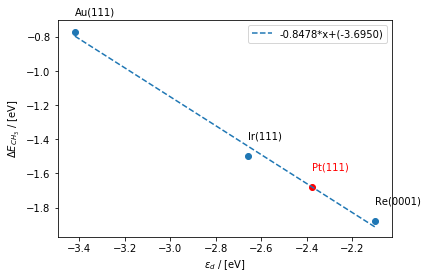

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from ase.db import connect
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import pickle
import copy

# Save table
el_dict={'Surface':['Au(111)','Ir(111)','Re(0001)'],'ed':[-3.42,-2.66,-2.10],'ECH3':[-0.77,-1.50,-1.88]}
ECH3_pt=-1.68

# Plot d-band center and chemisorption energies
plt.scatter(el_dict['ed'],el_dict['ECH3'])
# Calculate linear fit
a,b=np.polyfit(el_dict['ed'],el_dict['ECH3'],1)
x=np.linspace(np.nanmin(el_dict['ed']),np.nanmax(el_dict['ed']),50)
plt.plot(x,a*x+b,'--',label='{:.4f}*x+({:.4f})'.format(a,b))
for s,surf in enumerate(el_dict['Surface']):
    plt.text(el_dict['ed'][s],el_dict['ECH3'][s]+0.1,surf)
# d-band center of Pt(111) from linear fit
ed_pt=(ECH3_pt-b)/a
print('d-band center for Pt(111) = {:.2f} eV'.format(round(ed_pt,2)))
plt.scatter([ed_pt],[ECH3_pt],color='r')
plt.text(ed_pt,ECH3_pt+0.1,'Pt(111)',color='r')
plt.legend(loc=0)
plt.xlabel('$\epsilon_d$ / [eV]')
plt.ylabel('$\Delta E_{CH_3}$ / [eV]')
plt.show()


## b)

In the attached file (Pt(111).dat), you have been given the d-projected density of states for Pt(111). The Fermi level is placed at 0 eV. Calculate the mean relative to the Fermi level and determine whether Pt(111) follows the correlation from part 1.


### Solution

We can calculate the mean from the definition of an expectation value (page 119 in the book):
$$\left<\epsilon\right> = \frac{\int_{-\infty}^{\infty}\epsilon\rho(\epsilon) \mathrm{d} \epsilon}{\int_{-\infty}^{\infty}\rho(\epsilon) \mathrm{d} \epsilon}
$$
    
The numerical integration can be performed by summation, trapezoidal rule, Simpson's rule, or Gaussian quadrature. For this application the differences between methods are minor; Based on Simpson's rule, the d-band center of Pt(111) is at -2.42 eV. Pt(111) clearly follows the trend from part 1. 


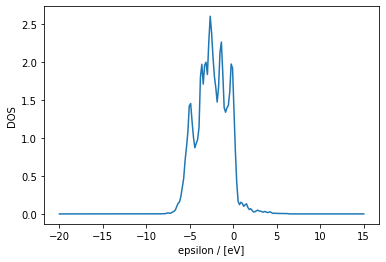

d-band center for Pt(111) = -2.42 eV


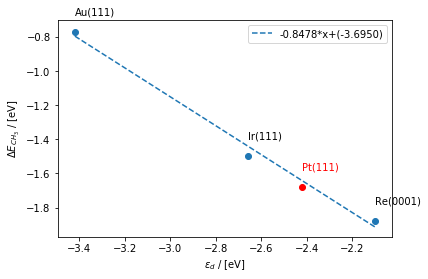

In [2]:
# Load the Pt(111).dat file
pt_dos=np.genfromtxt('Pt(111).dat',delimiter=' ')
epsilon,pt_dos=pt_dos[:,0],pt_dos[:,1]
# Show the density of state
plt.plot(epsilon,pt_dos)
plt.xlabel('epsilon / [eV]')
plt.ylabel('DOS')
plt.show()


def d_projected_dos(e,dos,n=1):
    'Calculate the moment of the DOS'
    dos_norm=dos/np.sum(dos)
    e_d=np.sum(e*dos_norm)
    if n>1:
        return np.sum(((e-e_d)**n)*dos_norm)
    return e_d

# Normalize the DOS
pt_dos_w=pt_dos/np.sum(pt_dos)
# Calculate the first moment or the d-band center of Pt(111)
pt_mean=d_projected_dos(epsilon,pt_dos,n=1)
print('d-band center for Pt(111) = {:.2f} eV'.format(round(pt_mean,2)))

# Plot the linear fit from Problem a
plt.scatter(el_dict['ed'],el_dict['ECH3'])
for s,surf in enumerate(el_dict['Surface']):
    plt.text(el_dict['ed'][s],el_dict['ECH3'][s]+0.1,surf)
a,b=np.polyfit(el_dict['ed'],el_dict['ECH3'],1)
x=np.linspace(np.nanmin(el_dict['ed']),np.nanmax(el_dict['ed']),50)
plt.plot(x,a*x+b,'--',label='{:.4f}*x+({:.4f})'.format(a,b))
plt.scatter([pt_mean],[ECH3_pt],color='red')
plt.text(pt_mean,ECH3_pt+0.1,'Pt(111)',color='r')
plt.legend(loc=0)
plt.xlabel('$\epsilon_d$ / [eV]')
plt.ylabel('$\Delta E_{CH_3}$ / [eV]')
plt.show()

For the next part of the problem we will assume that the d-band can be approximated as a simple rectangular function, i.e. $\rho(\epsilon)=\frac{1}{\omega}$ if $\epsilon_d-\frac{\omega}{2}\leq \epsilon \leq \epsilon_d+\frac{\omega}{2}$ and 0 otherwise where $\omega$ is the width of the band. This is shown schematically in Figure 1.

![dband.png](dband.png)


## c)

Calculate the second center moment of the distribution ($\sigma^2$) for Pt(111) as $\left<(\epsilon-\left<\epsilon\right>)^2\right>$. Based on the simple rectangular band model, what is the width of the d-band of Pt(111)?


### Solution

The second center moment ($\sigma^2$) is defined as:
$$\left<(\epsilon-\left<\epsilon\right>)^2\right> = \frac{\int_{-\infty}^{\infty}(\epsilon-\left<\epsilon\right>)^2\rho(\epsilon) \mathrm{d} \epsilon}{\int_{-\infty}^{\infty}\rho(\epsilon) \mathrm{d} \epsilon}$$

For Pt(111), with the density of states data provided here, the second center moment of d-band ($\sigma^2$) is 3.21. To obtain the well-defined width, first, we need to relate the variance of a rectangular band to its width. This is the well-known "Rectangular Band Model".

Since the width of a distribution is defined relative to its center, so we can safely shift the rectangular band to be centered at zero. In this way, the integration would be much more conveniently done from -W/2 to W/2. 

$$\left<\epsilon^2\right> = \int_{-W/2}^{W/2}\epsilon^2\rho(\epsilon) \mathrm{d} \epsilon
    =\int_{-W/2}^{W/2}\epsilon^2 \frac{1}{W} \mathrm{d} \epsilon=W^2/12$$
so, for rectangular band model, we have,
$$W=2\sqrt{3}\sigma$$
For Pt(111), we obtained $\sigma^2$ 3.21. The width (W) can be easily calculated to be 6.2 eV based on the rectangular band model. The simple rectangular band can capture the main character of the distribution. 

d-band variance = 3.21 eV^2
Width of the d-band in the rectangular band model = 6.2084 eV


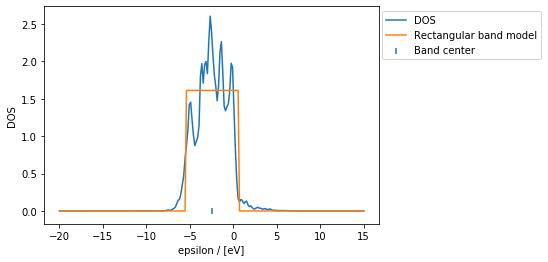

In [3]:
# Second moment is calculated
pt_var=d_projected_dos(epsilon,pt_dos,n=2)
print('d-band variance = {:.2f} eV^2'.format(round(pt_var,2)))
# The width of the rectangular band model
pt_width=2*np.sqrt(3*pt_var)
print('Width of the d-band in the rectangular band model = {:.4f} eV'.format(pt_width))

def rect_band_model(epsilon,epsilon_center,width):
    'Calculate the DOS with the rectangular band model'
    return np.array([10/width if epsilon_center-0.5*width<e<epsilon_center+0.5*width else 0 for e in epsilon])

# DOS with the rectangular band model
pt_dos_rect=rect_band_model(epsilon,pt_mean,pt_width)

# Show the DOS with the two models
plt.plot(epsilon,pt_dos,label='DOS')
plt.plot(epsilon,pt_dos_rect,label='Rectangular band model')
plt.scatter([pt_mean],[0],marker='|',label='Band center')
plt.xlabel('epsilon / [eV]')
plt.ylabel('DOS')
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

Next we will calculate the binding energy, $\Delta\textrm{E}$ using a series of simplifying assumptions. First, we assume that all electrons can be treated independently so that the total energy of the system can be calculated from the sum of the one-electron energies.

$$\textrm{E} = \sum_{occupied} \epsilon_{i}$$

We will further assume that we can calculate the bond energy between A and B as: 

$$\Delta\textrm{E} = \sum_{occupied} \epsilon_{i}^{AB} - \sum_{occupied} \epsilon_{i}^{A} - \sum_{occupied} \epsilon_{i}^{B}$$

If we take this to the continuous limit we will arrive at the following equation:

$$\Delta\textrm{E} = \int_{-\infty}^{E_{F}} \rho(\epsilon)(\epsilon - \epsilon_{0}) \textrm{d}\epsilon$$

where $\rho(\epsilon)$ is the density of states of the combined system and $\epsilon_0$ is the reference energy of the adsorbate atom and surface separately. In this simple problem we will assume that the adsorbate is an atom of the same metal of the surface, and that the d-band center is a good estimate of the reference energy (i.e. $\epsilon_0 = \epsilon_d$).

By substituting $\epsilon_0$ and the limits of the rectangular d-band this we arrive at:

1. $$\Delta\textrm{E} = \int_{\epsilon_d-\frac{w}{2}}^{0} \rho(\epsilon)(\epsilon-\epsilon_d)\textrm{d}\epsilon$$


Note that these are crude assumptions, but they simplify the problem considerably while yielding qualitatively correct results when the d-band filling is greater than 0.5. For the early transition-metals a more sophisticated model is necessary to properly capture orbital splitting. See e.g. *Chemical Bonding at Surface and Interfaces* by Nilsson, Pettersson, and Nørskov.


## d)

Use the rectangular d-band model and Equation 1 in order to calculate the binding energy as a function of d-band center and width, $\Delta E(\epsilon_d ,\omega)$.

### Solution

We begin by substituting the expression for $\rho(\epsilon)$ into the simplified expression for bond energy:

2. $$\Delta\textrm{E} = \int_{\epsilon_d-\frac{W}{2}}^{0} \rho(\epsilon)(\epsilon-\epsilon_d) \textrm{d}\epsilon ; \rho(\epsilon) = \frac{1}{W} \Rightarrow \Delta\textrm{E} = \int_{\epsilon_d-\frac{W}{2}}^{0} \frac{\epsilon-\epsilon_d}{W} \textrm{d}\epsilon$$

This is a very easy integral to evaluate and gives:

3. $$\Delta\textrm{E} = \frac{\epsilon_d}{W}(\epsilon_d-W/2)+\left[\frac{1}{2W}\epsilon^2\right]_{\epsilon_d-W/2}^0=\frac{1}{W}(\epsilon_d^2-\epsilon_dW/2)+\frac{-1}{2W}(\epsilon_d^2+(W/2)^2-\epsilon_dW)=\left(\frac{\epsilon_d^2}{2W}-\frac{W}{8}\right) $$

In [4]:
def binding_energy(density,energy,energy_ref,fermi=0):
    'The binding energy by using the true DOS and integration'
    under_fermi=energy<=fermi
    return np.trapz((density*(energy-energy_ref))[under_fermi],energy[under_fermi])/np.trapz(density,energy)

def binding_energy_reat(epsilon_center,width,fermi=0):
    'The binding energy by using the rectangular band model'
    return ((epsilon_center**2)/(2*width)-width/8)

print('Binding energy from density = {:.2f} eV'.format(round(binding_energy(pt_dos_rect,epsilon,pt_mean),2)))
print('Binding energy from the rectangular model = {:.2f}'.format(round(binding_energy_reat(pt_mean,pt_width),2)))


Binding energy from density = -0.31 eV
Binding energy from the rectangular model = -0.30


## e)
Calculate the fractional filling $f$ of the band as a function of $\epsilon_d$ and $W$. Express $\Delta E$ in terms of $f$ and $W$. 

Note that all transition metals have half filled s bands (in their bulk metallic states), which from the above analysis suggests that these give equal contributions to the bonding.  Hence, under the assumption that bonding from the s-band and d-band can be separated, it is clear that variations in the d-band determines variations in the strength of the metal.


### Solution

We can calculate the filling using the ratio of shaded area in Fig. 1 relative to the whole area of rectangle. The total area is 1. It is easy to see that the filling $f$ is given by $f = (0-(\epsilon_d - \frac{W}{2})) \times \frac{1}{W} = \frac{1}{2}-\frac{\epsilon_d}{W}$ or by:
$$f=\int_{\epsilon_d-W/2}^{0}{\rho(\epsilon)d\epsilon}=\frac{-1}{W}(\epsilon_d-W/2)=\frac{1}{2}-\frac{\epsilon_d}{W}$$
This implies that $\epsilon_d = \frac{W}{2}-fW$. Substituting this relationship into Equation 3 gives:
$$\Delta\textrm{E} = \frac{W}{2}f(f-1)$$

    

In [5]:
def fraction_density(epsilon_center,width):
    'Calculate the fractional filling'
    return 0.5-epsilon_center/width

def binding_energy_reat_frac(fraction,width):
    'Calculate the binding energy from the fractional filling and width'
    return width*fraction*(fraction-1)/2

frac_d=fraction_density(pt_mean,pt_width)
print('Fractional filling for Pt(111) = {:.2f}'.format(frac_d))
print('Binding energy for Pt(111) = {:.2f} eV'.format(binding_energy_reat_frac(frac_d,pt_width)))


Fractional filling for Pt(111) = 0.89
Binding energy for Pt(111) = -0.30 eV


Note that we can also do this by dividing the integral of the density of states:
$$f=\frac{\int_{-\infty}^{E_F}\rho(\epsilon)\mathrm{d}\epsilon}{\int_{-\infty}^{\infty}\rho(\epsilon)\mathrm{d}\epsilon}$$
Which will give an exactly equivalent answer, but is more general as it applies to an arbitrary density distribution.

## f)

Plot the bond energy as a function of d-band filling, $f$, from $f=0.5$ to $f=1$. Assume that the width, $W$, is constant and equal to the d-band width of Pt(111) as calculated earlier in the problem. Which transition metals bind adsorbates most strongly according to this?

### Solution

The plot suggests that the transition metals with half-full d-bands bind adsorbates the strongest. From table 8.5 on page 199 we can see that the metallic state of Cr, Mo, and W have half-filled d-bands, thus we would expect them to be the most reactive of the transition metals. This is roughly correct despite the simplicity of the model we used here. This simple model is very good for describing cohesive energies of transition metals that have maximum at half-filled d-band.


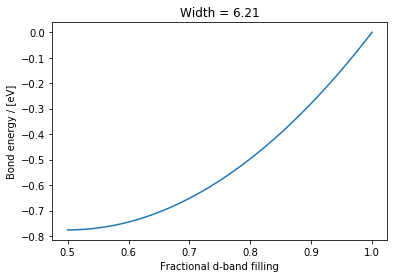

In [6]:
fraction_fill_list=np.linspace(0.5,1.0,100)
energy_diff_list=binding_energy_reat_frac(fraction_fill_list,pt_width)

plt.plot(fraction_fill_list,energy_diff_list)
plt.xlabel('Fractional d-band filling')
plt.ylabel('Bond energy / [eV]')
plt.title('Width = {:.2f}'.format(pt_width))
plt.show()